# sql_magic API

## Load extension

In [4]:
# TODO: load from github
%load_ext sql_magic

The sql_magic extension is already loaded. To reload it, use:
  %reload_ext sql_magic


## Connect to Spark engine

In [5]:
# TODO: make this shorter name
%config SQLConn.conn_object_name='spark'

In [3]:
%%readsql
SELECT 1

,1
0,1


## Use sql_magic with a psycopg2 connection

In [4]:
import pandas.io.sql as psql
import psycopg2
connect_credentials = {'database': 'postgres',
                       'host': 'localhost',
                       'password': '',
                       'user': 'postgres'}

# connect to postgres connection object
conn = psycopg2.connect(**connect_credentials)
conn.autocommit = True
schema_name = 'template'
psql.execute('SET search_path TO {}'.format(schema_name), conn)

<cursor object at 0x1153bc240; closed: 0>

In [5]:
%config SQLConn.conn_object_name='conn'

In [6]:
%%readsql
SELECT version()

,version
0,"PostgreSQL 9.6.1 on x86_64-apple-darwin14.5.0,..."


## Use sql_magic with a SQLAlchemy Engine

In [7]:
# sqllite conn
from sqlalchemy import create_engine
from sqlite3 import dbapi2 as sqlite
sqllite_engine = create_engine('sqlite+pysqlite:///test.db', module=sqlite)

In [8]:
%config SQLConn.conn_object_name='sqllite_engine'

In [9]:
%%readsql
SELECT sqlite_version();

,sqlite_version()
0,3.13.0


## Load dataset for example

In [ ]:
# spark
df = (spark.read.format("csv").options(header="true", inferSchema="true").load("titanic.csv"))
sqlContext.registerDataFrameAsTable(df, 'titanic')

In [11]:
# postgres
import pandas as pd
titanic = pd.read_csv('titanic.csv')
engine = create_engine('postgresql://{user}:{password}@{host}:5432/{database}'.format(**connect_credentials))
titanic.to_sql('titanic', engine, schema = 'template', if_exists='replace', index = False)

## Miscelleanous results

### Execute sql (not required for spark connections)
Queries with no result are run with %%execsql

In [12]:
%config SQLConn.conn_object_name='conn'

In [13]:
%%execsql
DROP TABLE IF EXISTS example_table;
CREATE TEMP TABLE example_table
AS
SELECT 1;

### Assign result to pandas dataframe

In [14]:
%config SQLConn.conn_object_name='conn'

In [15]:
%%readsql df
SELECT *
FROM titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,None,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,None,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,None,Southampton,no,True
5,0,3,male,NaN,0,0,8.4583,Q,Third,man,True,None,Queenstown,no,True
6,0,1,male,54.0,0,0,51.8625,S,First,man,True,E,Southampton,no,True
7,0,3,male,2.0,3,1,21.0750,S,Third,child,False,None,Southampton,no,False
8,1,3,female,27.0,0,2,11.1333,S,Third,woman,False,None,Southampton,yes,False
9,1,2,female,14.0,1,0,30.0708,C,Second,child,False,None,Cherbourg,yes,False


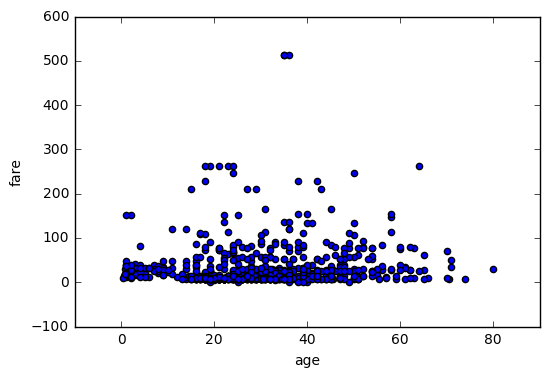

In [15]:
%matplotlib inline
df.plot('age', 'fare',kind='scatter')

### Utilize Python variables in SQL query

In [16]:
age_thresh = 22
sex = 'male'

In [17]:
%%readsql df
SELECT *
FROM titanic
WHERE (age < {age_thresh}) AND (sex = '{sex}')

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,2.00,3,1,21.0750,S,Third,child,False,None,Southampton,no,False
1,0,3,male,20.00,0,0,8.0500,S,Third,man,True,None,Southampton,no,True
2,0,3,male,2.00,4,1,29.1250,Q,Third,child,False,None,Queenstown,no,False
3,0,1,male,19.00,3,2,263.0000,S,First,man,True,C,Southampton,no,False
4,0,3,male,21.00,0,0,8.0500,S,Third,man,True,None,Southampton,no,True
5,0,3,male,7.00,4,1,39.6875,S,Third,child,False,None,Southampton,no,False
6,0,3,male,21.00,0,0,7.8000,S,Third,man,True,None,Southampton,no,True
7,0,3,male,11.00,5,2,46.9000,S,Third,child,False,None,Southampton,no,False
8,0,3,male,4.00,3,2,27.9000,S,Third,child,False,None,Southampton,no,False
9,0,3,male,19.00,0,0,8.1583,S,Third,man,True,None,Southampton,no,True


## Asynchronous calls
Queries can be run in async mode using the --async (or -a) flag. Displaying results from async calls are disabled by default.

In [16]:
%%readsql df -a
SELECT *
FROM titanic

# Configuration

## Flags
Notifications and auto-display can be temporarily disabled with flags:
<pre>
positional arguments:
  table_name

optional arguments:
  -h, --help     show this help message and exit
  -n, --notify   Toggle option for notifying query result
  -a, --async    Run query in seperate thread. Please be cautious when
                 assigning result to a variable
  -d, --display  Toggle option for outputing query result
</pre>
  

In [19]:
%%readsql
SELECT 1

,?column?
0,1


In [20]:
%%readsql -d
SELECT 1

## Defaults
Notifications and displaying results are enabled by default, but can be turned off with %config magic

In [21]:
# alerts and display are automatically enabled
%config SQLConn

SQLConn options
-------------
SQLConn.conn_object_name=<Unicode>
    Current: u'conn'
    Object name for accessing computing resource environment
SQLConn.notify_result=<Bool>
    Current: True
    Notify query result to stdout
SQLConn.output_result=<Bool>
    Current: True
    Output query result to stdout


In [22]:
%config SQLConn.output_result = False

In [23]:
%%readsql
SELECT 1